In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn joblib


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import joblib

In [ ]:
data=pd.read_csv('/content/Customer_Data.csv')

In [ ]:
data.shape

(6418, 32)

In [ ]:
data.describe

<bound method NDFrame.describe of      Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0      19877-DEL    Male   35      No          Delhi                    7   
1      58353-MAH  Female   45     Yes    Maharashtra                   14   
2      25063-WES    Male   51      No    West Bengal                    4   
3      59787-KAR    Male   79      No      Karnataka                    3   
4      28544-TAM  Female   80      No     Tamil Nadu                    3   
...          ...     ...  ...     ...            ...                  ...   
6413   43397-UTT  Female   41      No  Uttar Pradesh                    6   
6414   22240-HAR    Male   51     Yes        Haryana                    0   
6415   78682-KER  Female   65     Yes         Kerala                   14   
6416   17816-ODI    Male   23      No         Odisha                    2   
6417   34476-TAM    Male   73      No     Tamil Nadu                   13   

      Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                   27        NaN           Yes             No  ...   
1                   13        NaN           Yes            Yes  ...   
2                   35     Deal 5           Yes             No  ...   
3                   21     Deal 4           Yes             No  ...   
4                    8        NaN           Yes             No  ...   
...                ...        ...           ...            ...  ...   
6413                33        NaN           Yes            Yes  ...   
6414                19     Deal 1            No            NaN  ...   
6415                25        NaN           Yes            Yes  ...   
6416                10        NaN           Yes            Yes  ...   
6417                21        NaN           Yes             No  ...   

       Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0         Credit Card          65.60        593.30          0.00   
1         Credit Card          -4.00        542.40         38.33   
2     Bank Withdrawal          73.90        280.85          0.00   
3     Bank Withdrawal          98.00       1237.85          0.00   
4         Credit Card          83.90        267.40          0.00   
...               ...            ...           ...           ...   
6413      Credit Card          74.40        896.75          0.00   
6414      Credit Card          45.25       3139.80          0.00   
6415  Bank Withdrawal          74.95       2869.85          0.00   
6416      Credit Card          70.15       4480.70          0.00   
6417  Bank Withdrawal          96.85       1235.55          0.00   

     Total_Extra_Data_Charges Total_Long_Distance_Charges Total_Revenue  \
0                           0                      381.51        974.81   
1                          10                       96.21        610.28   
2                           0                      134.60        415.45   
3                           0                      361.66       1599.51   
4                           0                       22.14        289.54   
...                       ...                         ...           ...   
6413                        0                       37.96        934.71   
6414                        0                        0.00       3139.80   
6415                        0                      599.64       3469.49   
6416                        0                     2107.52       6588.22   
6417                        0                      346.84       1582.39   

     Customer_Status   Churn_Category                   Churn_Reason  
0             Stayed              NaN                            NaN  
1             Stayed              NaN                            NaN  
2            Churned       Competitor  Competitor had better devices  
3            Churned  Dissatisfaction        Product dissatisfaction  
4            Churned  Dissatisfaction            Network reliability  
...              ...              ...       

In [ ]:
data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [ ]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)


In [ ]:
columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]


In [ ]:
label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])



# Manually encode the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})


In [ ]:
X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']



# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_cleaned, y_train_cleaned)

RandomForestClassifier(random_state=42)

In [ ]:
# Check for missing values in y_train
print("Missing values in y_train before dropping:", y_train.isnull().sum())

# Get the index of rows with missing values in y_train
nan_indices = y_train[y_train.isnull()].index

# Drop rows with missing values from both X_train and y_train
X_train_cleaned = X_train.drop(nan_indices)
y_train_cleaned = y_train.drop(nan_indices)

# Verify that missing values are removed
print("Missing values in y_train after dropping:", y_train_cleaned.isnull().sum())

Missing values in y_train before dropping: 322
Missing values in y_train after dropping: 0


In [ ]:
# Evaluate Model

# Make predictions
y_pred = rf_model.predict(X_test_cleaned)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test_cleaned, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_cleaned, y_pred))

Confusion Matrix:
[[833  43]
 [123 196]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       876
         1.0       0.82      0.61      0.70       319

    accuracy                           0.86      1195
   macro avg       0.85      0.78      0.81      1195
weighted avg       0.86      0.86      0.85      1195



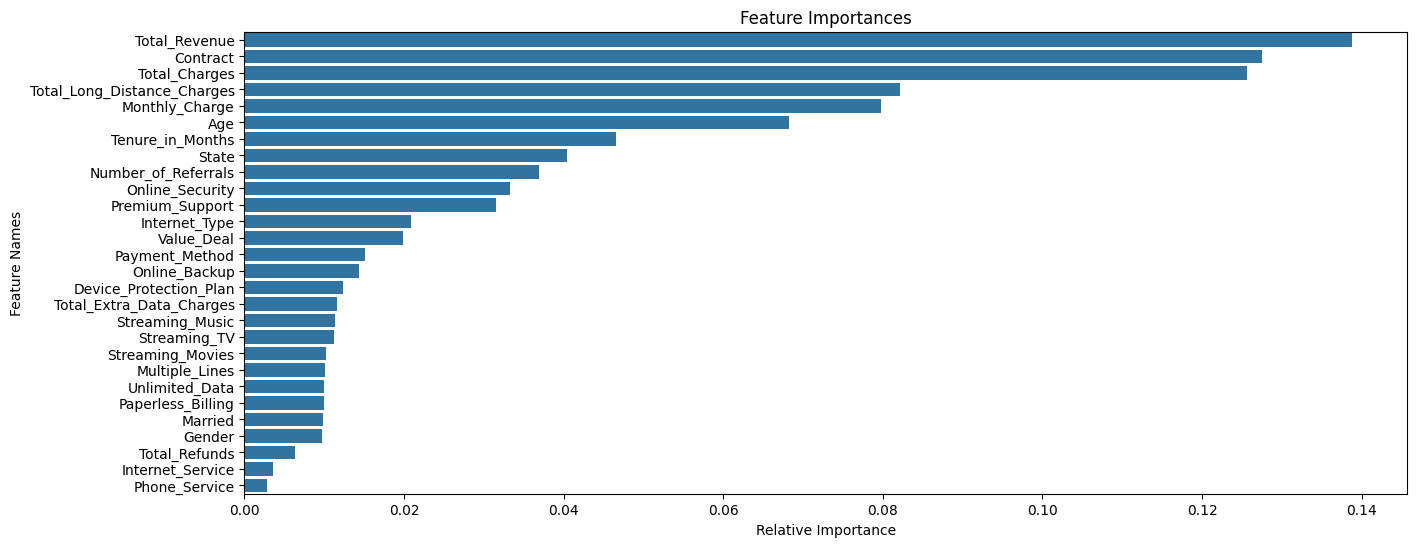

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names according to sorted feature importances
feature_names = [X_train_cleaned.columns[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=feature_names)
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()